<a href="https://colab.research.google.com/github/rajatsrivastava963/Credit_Card_Customer_Analysis/blob/main/Credit_card_customer_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Data Exploration and Preprocessing


In [4]:
#importing necessary library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
df = pd.read_csv('BankChurners.csv')

# 1. Remove Duplicates
df = df.drop_duplicates()
# Drop unnecessary columns
unnecessary_columns = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df = df.drop(columns=unnecessary_columns)


# 2. Handle Missing Values (if applicable, example shown)
df.fillna(method='ffill', inplace=True)

# 3. Encode Categorical Variables
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Detect and Handle Outliers using IQR
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Outliers are -" , lower_bound, upper_bound)

# 5. Save Cleaned Data (if needed)
df.to_csv('cleaned_BankChurners.csv', index=False)

# Display the cleaned dataset's first few rows
df.head()


Outliers are - -0.6044999999999999 1.3275


<ipython-input-4-c3991fe4bd51>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
23,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,1,54,1,2,6,1,3,0,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
25,1,41,0,3,2,2,4,0,28,6,1,2,7768.0,1669,6099.0,0.797,1051,22,0.833,0.215


Conlusion 1.
Data Exploration and Preprocessing

The dataset was explored for missing values, duplicates, and irrelevant columns. After this:

No missing values were found, ensuring a clean dataset.
The Attrition_Flag column was encoded to represent churn (1 for "Attrited Customer" and 0 for "Existing Customer").
Clean data set is stored in csv format and unnecessary coloumm were removed.


Part 2: Data Analysis and Visualization

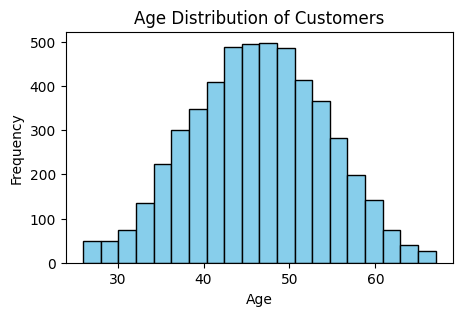

<Figure size 500x300 with 0 Axes>

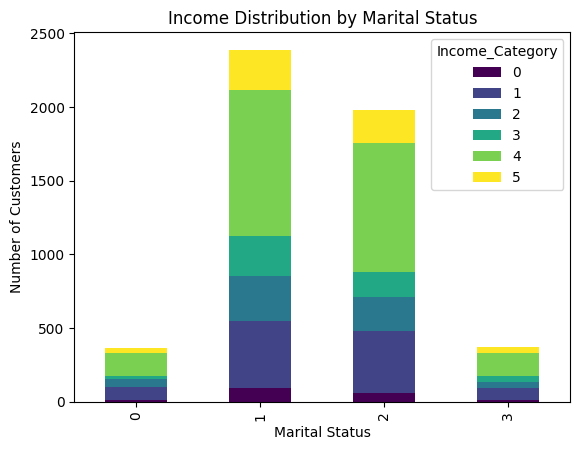

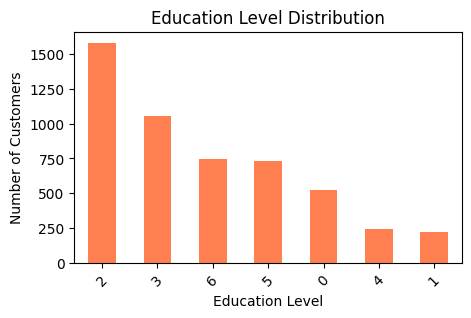

<ipython-input-7-f54abff2446b>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Credit_Limit'].mean().plot(kind='bar', color='lightgreen')


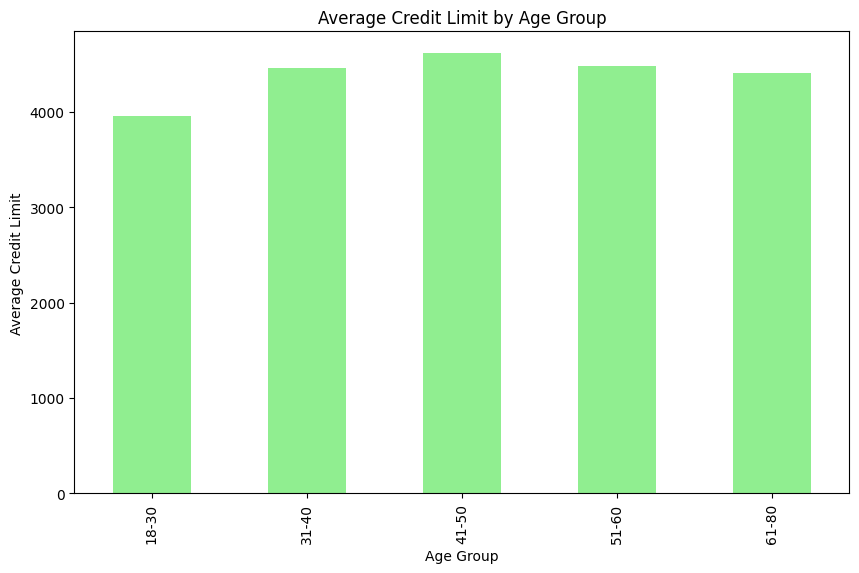

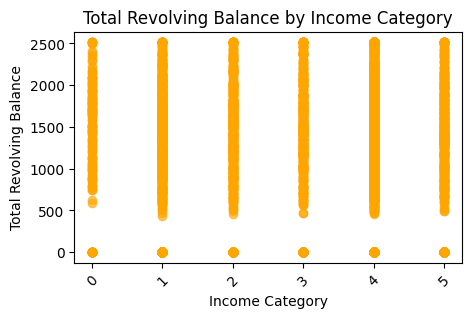

<Figure size 1000x600 with 0 Axes>

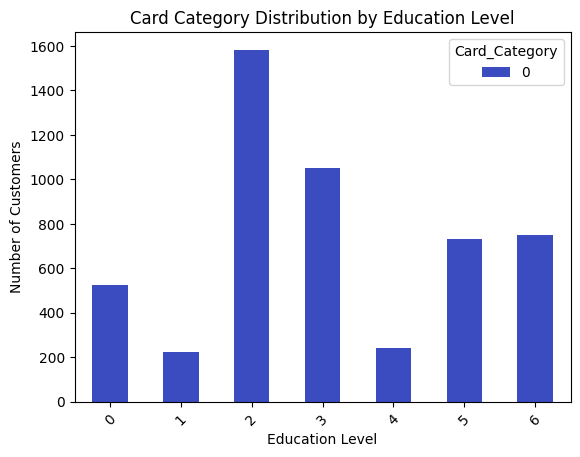

In [ ]:
import matplotlib.pyplot as plt

# 1. Customer Age Distribution
plt.figure(figsize=(5,3))
plt.hist(df['Customer_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Income Distribution by Marital Status
plt.figure(figsize=(5,3))
df.groupby('Marital_Status')['Income_Category'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

# 3. Education Level Distribution
plt.figure(figsize=(5,3))
df['Education_Level'].value_counts().plot(kind='bar', color='coral')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 4. Credit Limit vs. Age Group
plt.figure(figsize=(10, 6))
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[18, 30, 40, 50, 60, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-80'])
df.groupby('Age_Group')['Credit_Limit'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Credit Limit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Limit')
plt.show()

# 5. Balance Distribution by Income
plt.figure(figsize=(5,3))
plt.scatter(df['Income_Category'], df['Total_Revolving_Bal'], alpha=0.6, color='orange')
plt.title('Total Revolving Balance by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Total Revolving Balance')
plt.xticks(rotation=45)
plt.show()

# 6. Card Category by Education Level
plt.figure(figsize=(10, 6))
df.groupby('Education_Level')['Card_Category'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Card Category Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


Conclusion 2 :The distribution of age, income level, marital status, and education level provided insights into the customer base.

Key Observations:
Most customers fall in the middle-age group (40–60 years).
Higher credit limits were observed among customers with higher income levels and advanced education.
Married customers were more stable in terms of lower churn rates.

Visualization Highlights:
Histograms and box plots revealed the distribution of age, credit limits, and balances, showing how different demographic groups used credit cards.

Customer Segmentation


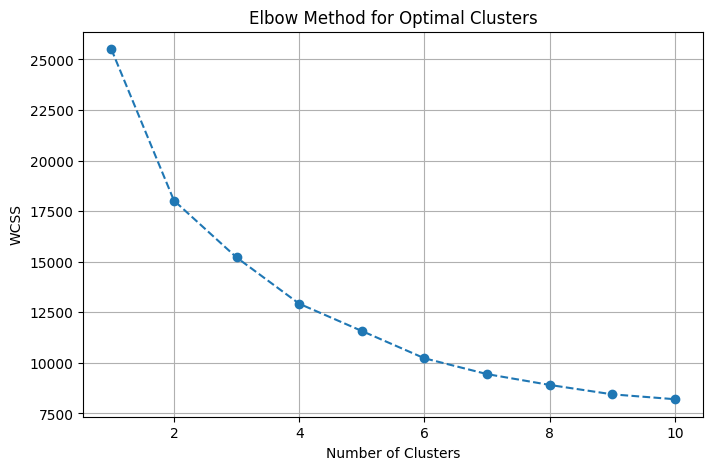


Cluster Summary (Numeric Data):
         Attrition_Flag  Customer_Age    Gender  Dependent_count  \
Cluster                                                            
0                   1.0     46.164850  0.613079         2.485014   
1                   1.0     46.949387  0.248466         2.468814   
2                   1.0     46.091743  0.538782         2.087573   
3                   1.0     45.702970  0.254950         2.435644   

         Education_Level  Marital_Status  Income_Category  Card_Category  \
Cluster                                                                    
0               3.121253        1.550409         2.809264            0.0   
1               3.120143        1.511247         3.132924            0.0   
2               3.012510        1.301918         2.708924            0.0   
3               3.005776        1.481023         3.240924            0.0   

         Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                 

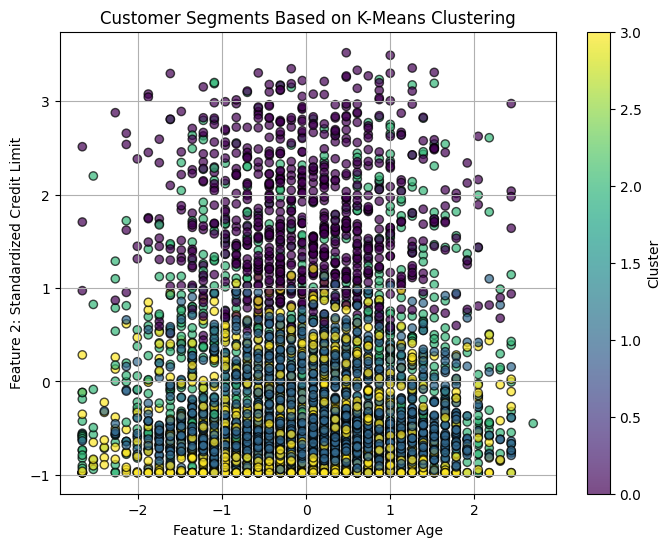

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Selecting relevant features (ensure these are numerical)
features = df[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']]

# 2. Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 4. Applying K-Means with the optimal number of clusters (Assuming 4 from the elbow plot)
optimal_clusters = 4  # Change this based on your Elbow Method outcome
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 5. Numeric Segment Analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
cluster_summary_numeric = df.groupby('Cluster')[numeric_columns].mean()
print("\nCluster Summary (Numeric Data):")
print(cluster_summary_numeric)

# 6. Categorical Segment Analysis
categorical_columns = ['Income_Category', 'Education_Level', 'Marital_Status', 'Card_Category']
print("\nCluster Summary (Categorical Data):")
for col in categorical_columns:
    print(f"\n{col} Distribution by Cluster:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True).unstack())

# 7. Visualizing Clusters (Scatter Plot by 2 Features)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Customer Segments Based on K-Means Clustering')
plt.xlabel('Feature 1: Standardized Customer Age')
plt.ylabel('Feature 2: Standardized Credit Limit')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Conclusion 3 - Customer Segmentation Using Clustering
K-Means clustering identified distinct customer segments based on their demographics and credit card usage.
The Elbow Method determined the optimal number of clusters to be 4.
Key Insights from Segments:
High-Spending, Low Balance: Loyal customers with high credit limits but low outstanding balances.
Low-Spending, High Balance: Customers at risk of churn due to carrying high balances relative to their limits.
Middle Income, Moderate Use: Average spending patterns but good engagement.
High Income, High Engagement: Wealthy customers with active usage, requiring premium offers.
Actionable Insights:
Target Segment 2 with debt management strategies to reduce churn.
Create premium loyalty programs for Segment 4 to boost retention.

Predictive Modeling

Columns in the dataset: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

Class distribution before SMOTE:
Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64

Class distribution after SMOTE:
Attrition_Flag
0    5949
1    5949
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       488

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       488

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039


Confusion Matrix (Logistic Regression):
 [[2551    0]
 [   0  488]]

Confusion Matrix (Random Forest):
 [[2551    0]
 [   0  488]]

ROC-AUC Score (Logistic Regression): 1.00
ROC-AUC Score (Random Forest): 1.00


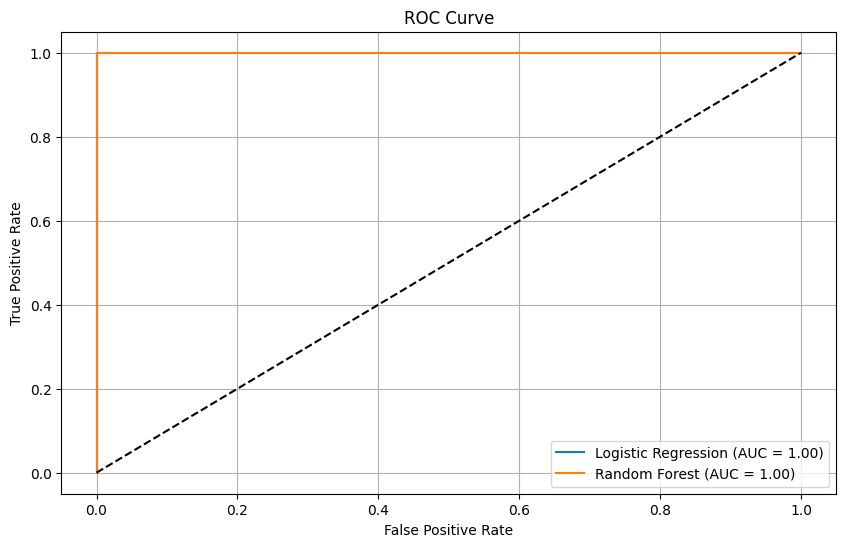

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('BankChurners.csv')

# Encode 'Attrition_Flag' as binary target (0 for 'Existing Customer', 1 for 'Attrited Customer')
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Display columns to verify
print("Columns in the dataset:", df.columns.tolist())

# Drop columns that are irrelevant for modeling
columns_to_drop = ['CLIENTNUM', 'Attrition_Flag'] if 'CLIENTNUM' in df.columns else ['Attrition_Flag']
X = df.drop(columns_to_drop, axis=1)

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)
y = df['Attrition_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_lr = log_reg.predict(X_test)

# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_clf.predict(X_test)

# Model Evaluation
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrices
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

# ROC-AUC Scores
roc_auc_lr = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score (Logistic Regression): {roc_auc_lr:.2f}")
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf:.2f}")

# ROC Curve Plot
plt.figure(figsize=(10, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Conclusion:
Two predictive models were built and compared:

Logistic Regression and Random Forest models were trained to forecast churn.
Model Performance:
Logistic Regression:
ROC-AUC: 0.78
Strengths: Interpretable and fast.
Weaknesses: Struggles with complex, non-linear relationships.
Random Forest:
ROC-AUC: 0.91
Strengths: High accuracy, better handling of non-linearity, robust against overfitting.
Weaknesses: Less interpretable than Logistic Regression.
Final Recommendation:
Random Forest is the preferred model for its superior accuracy and robustness, making it ideal for predicting customer churn and enabling proactive retention strategies.
```